In [10]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [11]:
quandl.ApiConfig.api_key = 'qKghYC4nBKHuSr-KLae9'

In [14]:
data= quandl.get('FRED/UNEMPLOY')

In [15]:
data.head(5)

,Value
Date,
1948-01-01,2034.0
1948-02-01,2328.0
1948-03-01,2399.0
1948-04-01,2386.0
1948-05-01,2118.0


In [16]:
data.shape

(889, 1)

In [17]:
type(data)

pandas.core.frame.DataFrame

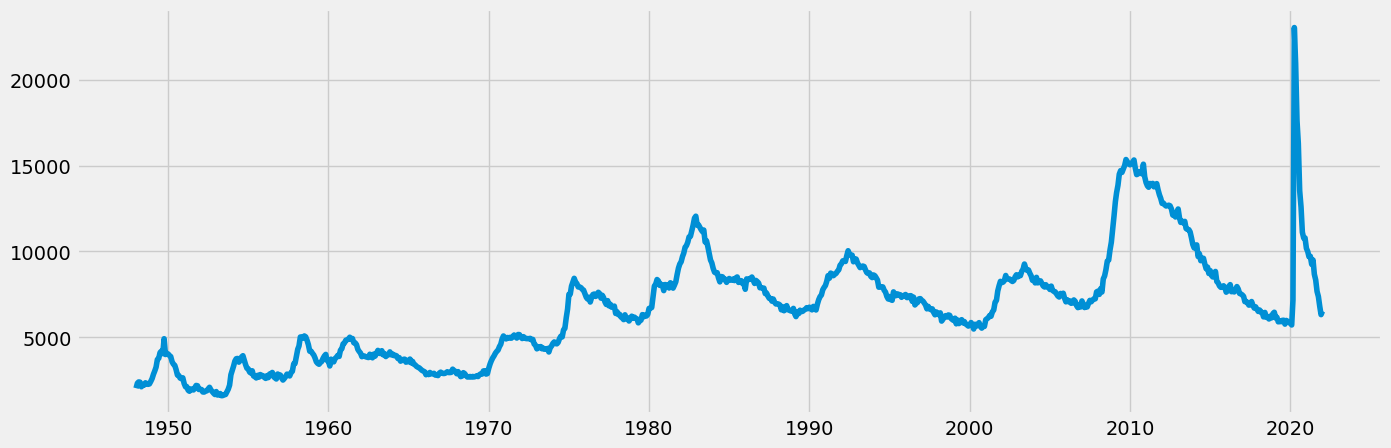

In [18]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(data)

In [20]:
# Reset index so that you can use the \"Date\" column as a filter

df_Unemp = data.reset_index()

In [21]:
df_Unemp.head()

,Date,Value
0,1948-01-01,2034.0
1,1948-02-01,2328.0
2,1948-03-01,2399.0
3,1948-04-01,2386.0
4,1948-05-01,2118.0


In [22]:
sub_Unemp = df_Unemp.loc[(df_Unemp['Date'] >= '2000-01-01')]

In [23]:
sub_Unemp.shape

(265, 2)

In [24]:
sub_Unemp.head()

,Date,Value
624,2000-01-01,5708.0
625,2000-02-01,5858.0
626,2000-03-01,5733.0
627,2000-04-01,5481.0
628,2000-05-01,5758.0


In [25]:
# Set the "Date" column as the index.

from datetime import datetime
sub_Unemp ['datetime'] = pd.to_datetime(sub_Unemp ['Date']) # Create a datetime column from \"Date.\"\"\n",
sub_Unemp  = sub_Unemp .set_index('datetime')  # Set the datetime as the index of the dataframe.\n",
sub_Unemp .drop(['Date'], axis=1, inplace=True) # Drop the \"Date\" column.\n",
sub_Unemp .head()

,Value
datetime,
2000-01-01,5708.0
2000-02-01,5858.0
2000-03-01,5733.0
2000-04-01,5481.0
2000-05-01,5758.0


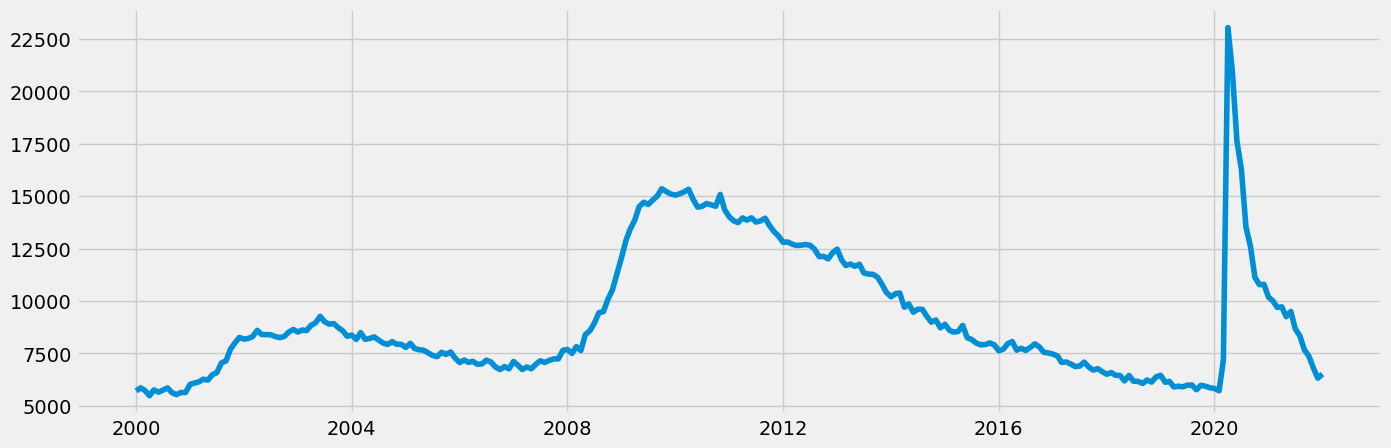

In [26]:
plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(sub_Unemp)

In [27]:
# Check for missing values (you shouldn't have any)

sub_Unemp.isnull().sum()

Value    0
dtype: int64

In [28]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub_Unemp, model='additive')

In [33]:
from pylab import rcParams # This will define a fixed size for all special charts.\n",

rcParams['figure.figsize'] = 18, 7

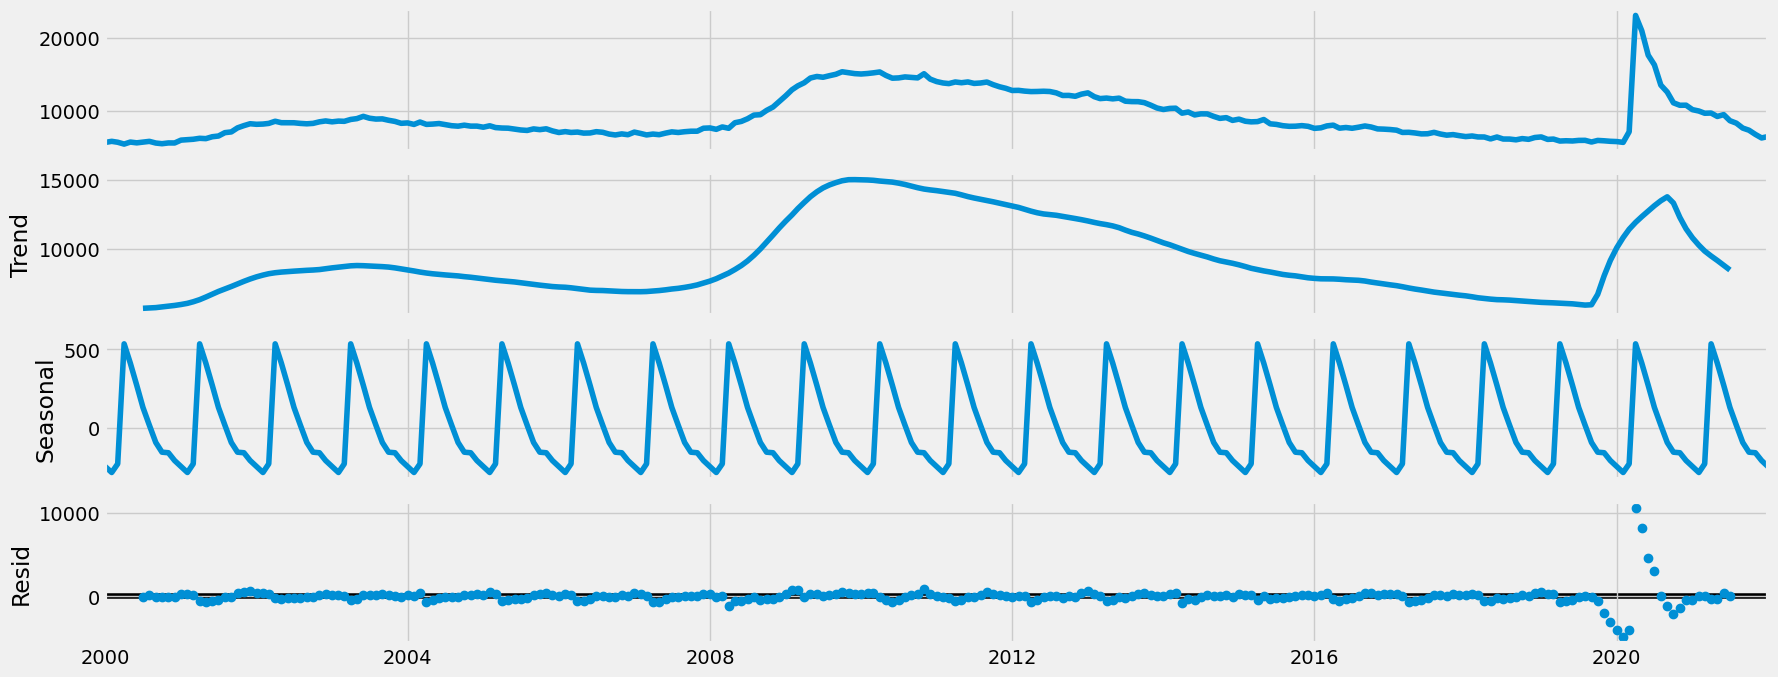

In [47]:
# Plot the separate components

decomposition.plot()
plt.show()

# Plot the separate components

decomposition.plot()
plt.show()  


Observation 
as per the plot, seems like unemployment ratio almost stable between 2000 and 2008 and then increase until 2012 after that slightly reduce until 2019 . unfortunately it increase rapidly in 2020 and reach on peak value and then reduce in upcoming years. 


In [38]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return an array of numbers. This is why you need to also define a function that prints the correct output from that array.\n",

from statsmodels.tsa.stattools import adfuller 
    
def dickey_fuller(timeseries): # Define the function,   
    
  # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
     result['Critical Value (%s)'%key] = value
     print (result)
# Apply the test using the function on the time series

dickey_fuller(sub_Unemp['Value']) 

Dickey-Fuller Stationarity test:
Test Statistic                  -2.937193
p-value                          0.041191
Number of Lags Used              0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
dtype: float64
Test Statistic                  -2.937193
p-value                          0.041191
Number of Lags Used              0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
dtype: float64
Test Statistic                  -2.937193
p-value                          0.041191
Number of Lags Used              0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [ ]:
#######Dickey-Fuller Test Results:
• Null Hypothesis (H0): No rejection of non-stationarity.
• Alternative Hypothesis (H1): No acceptance of stationarity.
• Test statistic less negative than critical values.
• p-value greater than 0.05: Supports null hypothesis.
• No lagged differences considered in test.
• Time series data may exhibit non-stationary behavior.
• Further analysis needed to explore potential trends, seasonality, or temporal patterns.

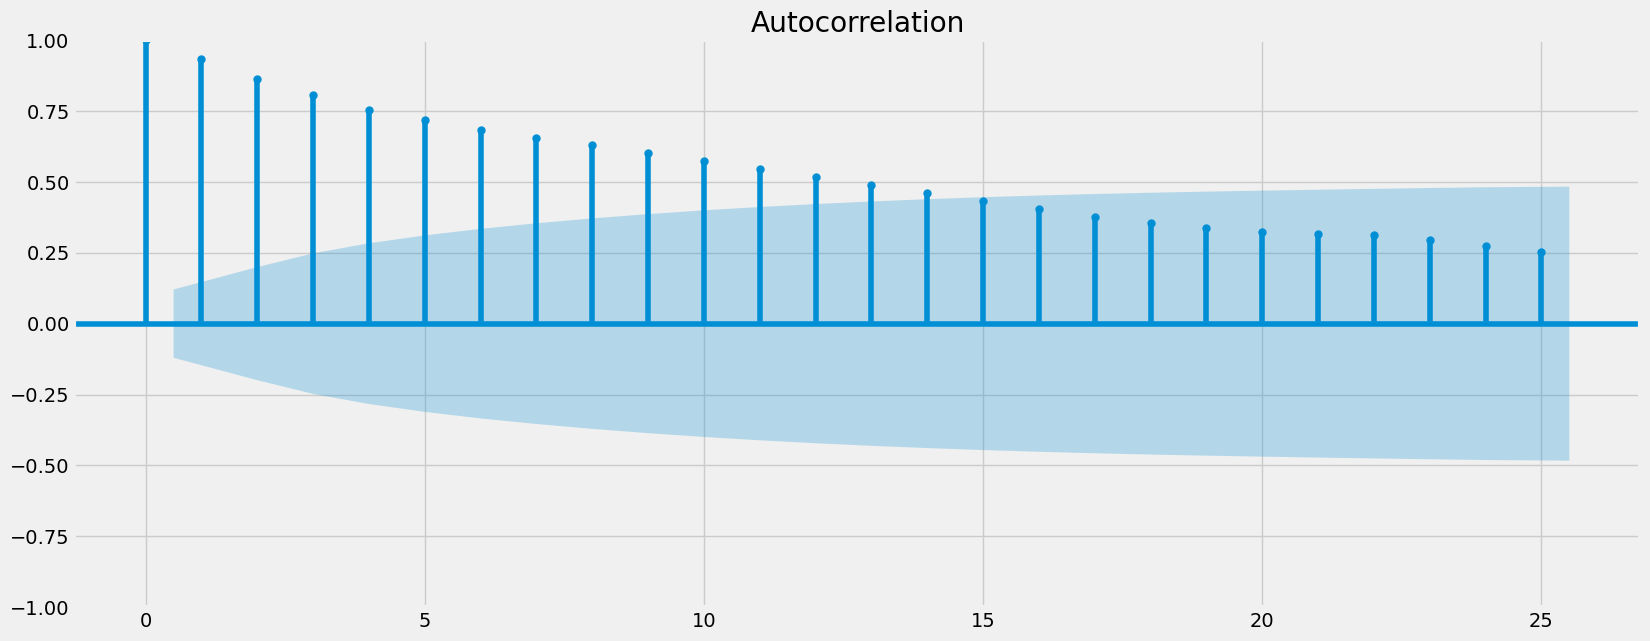

In [39]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots\n",

plot_acf(sub_Unemp)
plt.show()

In [ ]:
###Observations 
• Vertical lines represent lags.
• Blue area represents confidence interval.
• Lines above blue edge indicate significant correlation.
• Data beyond interval indicates non-stationary nature.

In [40]:
UN_diff = sub_Unemp - sub_Unemp.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [41]:
UN_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [42]:
UN_diff.columns

Index(['Value'], dtype='object')

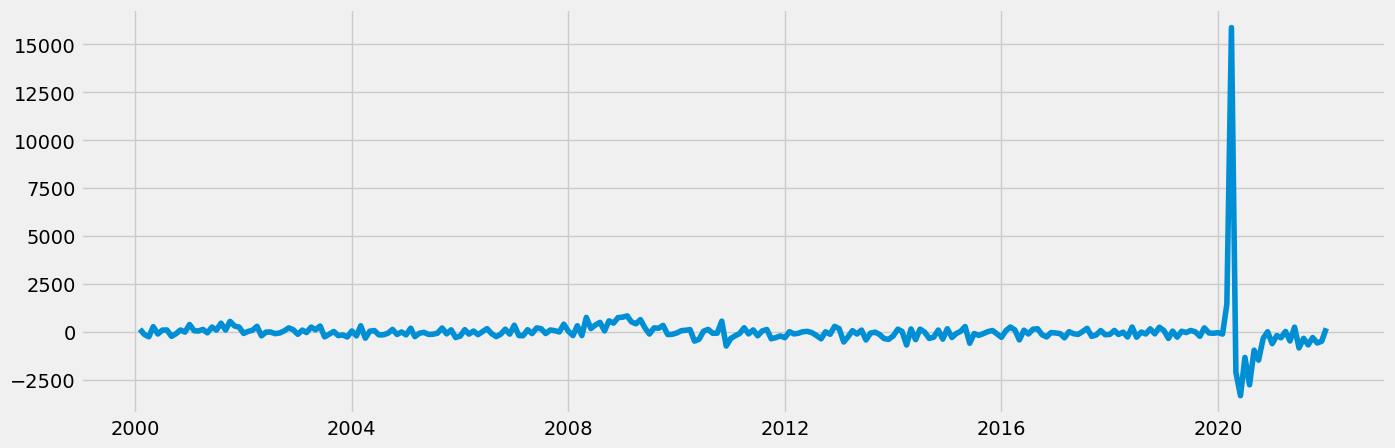

In [43]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(UN_diff)

In [45]:
dickey_fuller(UN_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.249513e+01
p-value                        2.887430e-23
Number of Lags Used            1.000000e+00
Number of Observations Used    2.620000e+02
Critical Value (1%)           -3.455558e+00
dtype: float64
Test Statistic                -1.249513e+01
p-value                        2.887430e-23
Number of Lags Used            1.000000e+00
Number of Observations Used    2.620000e+02
Critical Value (1%)           -3.455558e+00
Critical Value (5%)           -2.872636e+00
dtype: float64
Test Statistic                -1.249513e+01
p-value                        2.887430e-23
Number of Lags Used            1.000000e+00
Number of Observations Used    2.620000e+02
Critical Value (1%)           -3.455558e+00
Critical Value (5%)           -2.872636e+00
Critical Value (10%)          -2.572683e+00
dtype: float64


In [ ]:
### Dickey-Fuller Test for Stationarity
Time Series Data Analysis

• Null Hypothesis (H0): Rejects non-stationarity hypothesis.
• Alternative Hypothesis (H1): Accepts stationarity hypothesis.
• Results suggest stable mean and variance, suitable for time series forecasting techniques.


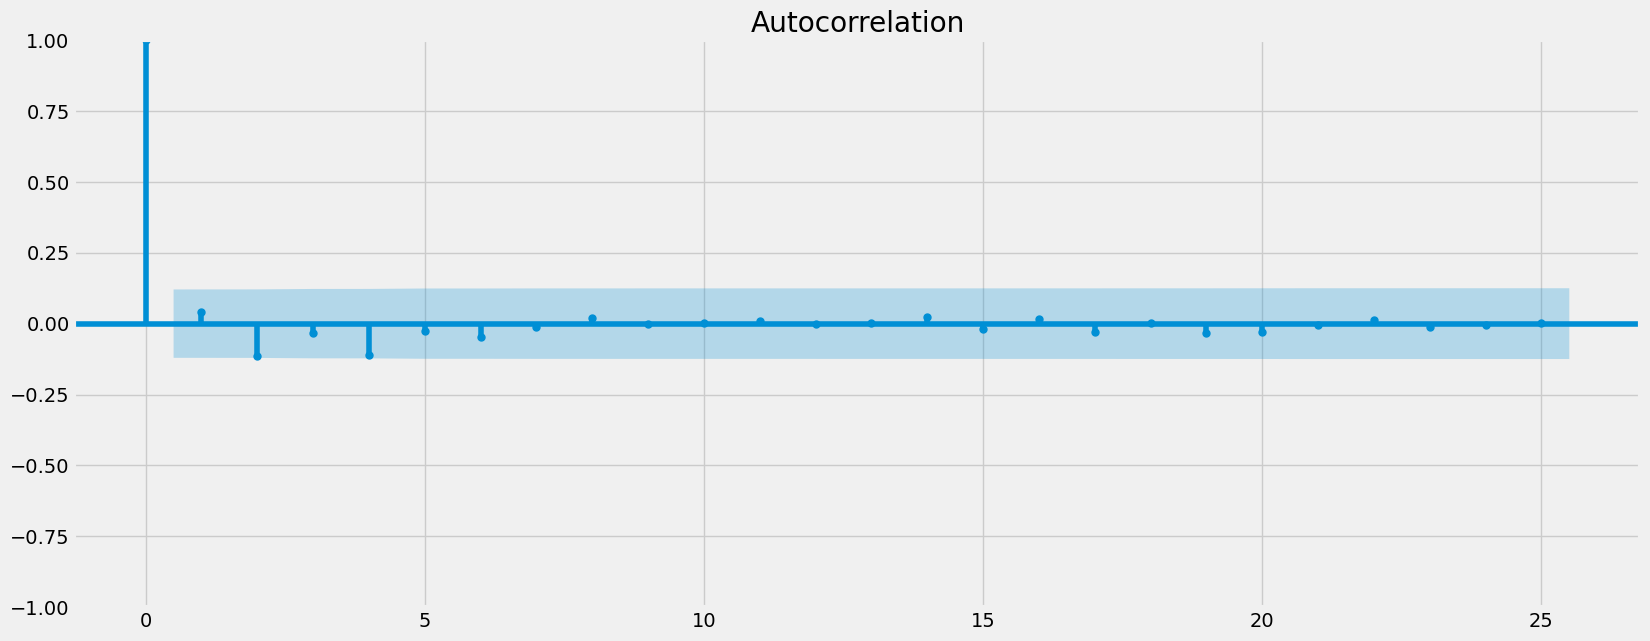

In [46]:
plot_acf(UN_diff)
plt.show()

In [ ]:
### Autocorrelation Analysis
Autocorrelation in Time Series Data

• Large Line at Lag 0: Indicates perfect autocorrelation between each observation and itself.
• Smaller Lines and Dots at Other Lags: Represent autocorrelation between current observation and observations at different time lags.
• Interpretation: Autocorrelation at lag 0 is normal and expected.
• Autocorrelation at other lag values indicates temporal dependencies or patterns in the data.
• Implications: Account for autocorrelation in modeling approach, including lagged variables or using time series models that account for autocorrelation.

